<a href="https://colab.research.google.com/github/RenanBnu/A3_Inteligencia_Artificial/blob/main/anime_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importando Bibliotecas**

Nova secção


In [1]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.1 MB/s eta 0:00:00


In [62]:
# Lendo o Dataset
import numpy as np
import pandas as pd

### **Carregando DataSet**

In [63]:
# Configurando a exibição das colunas para 50
pd.set_option('display.max_columns', 50)

In [64]:
# Importando arquivo csv dos dados dos animes
df_anime=pd.read_csv('/content/drive/MyDrive/anime-dataset/anime-dataset-2023.csv')
print("Tamanho do conjunto de dados:",df_anime.shape)
df_anime.head(3)

Tamanho do conjunto de dados: (24905, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


In [65]:
# Importando o DataFrame de Detalhes dos usuários
df_user=pd.read_csv('/content/drive/MyDrive/anime-dataset/users-details-2023.csv')
print("Tamanho do conjunto de dados:",df_user.shape)
df_user.head()

Tamanho do conjunto de dados: (731290, 16)


,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [66]:
# Importing user score dataframe
df_score=pd.read_csv('/content/drive/MyDrive/anime-dataset/users-score-2023.csv')
print("Tamanho do conjunto de dados:",df_score.shape)
df_score.head()

Tamanho do conjunto de dados: (24325191, 5)


,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


### **Análise Exploratória de Dados**

Para entender melhor os dados, examinaremos cada DataFrame usando o método info(), que oferece uma visão geral das colunas e da estrutura, além de ajudar a identificar valores ausentes.

In [67]:
# Verificando o dataframe df_anime
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [76]:
# Verificando a coluna Score do df_anime
df_anime['Score'].value_counts()

,count
Score,
6.38,9282
6.54,80
6.31,80
6.25,79
6.51,79
...,...
3.65,1
9.00,1
3.50,1


In [75]:
# Filtra os valores da coluna 'Score', excluindo os que possuem o valor 'UNKNOWN'
scores = df_anime['Score'][df_anime['Score'] != 'UNKNOWN']

# Converte pra float
scores = scores.astype('float')

# Calcula a média dos valores numéricos na coluna 'Score', arredondando para 2 casas decimais
score_mean = round(scores.mean(), 2)

# Substitui todos os valores 'UNKNOWN' na coluna 'Score' pela média calculada
df_anime['Score'] = df_anime['Score'].replace('UNKNOWN', score_mean)

# Converte a coluna Score para float, permitindo calculos
df_anime['Score'] = df_anime['Score'].astype('float64')

In [77]:
# Processamento da coluna de Rank
df_anime['Rank'].value_counts()

,count
Rank,
0.0,187
17431.0,4
15259.0,4
11786.0,4
18411.0,4
...,...
1855.0,1
98.0,1
96.0,1


In [78]:
df_anime['Rank'] = df_anime['Rank'].replace('UNKNOWN', np.nan)
df_anime['Rank'] = df_anime['Rank'].astype('float64')

In [73]:
# Verificando o dataframe df_user
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [74]:
# Verificar quais colunas do dataframe df_score estão com valores nulos
df_score.isnull().sum()

,0
user_id,0
Username,232
anime_id,0
Anime Title,0
rating,0


In [14]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   Username     object
 2   anime_id     int64 
 3   Anime Title  object
 4   rating       int64 
dtypes: int64(3), object(2)
memory usage: 927.9+ MB


### Bibliotecas que vão ser usadas no modelo de treinamento

In [15]:
# Salvar histórico de treinamento de modelo
import json

# Pré-processamento de Dados
from sklearn.preprocessing import MinMaxScaler  # Normaliza os dados, ajustando-os para um intervalo específico (ex.: 0 a 1).
from sklearn.preprocessing import LabelEncoder  # Transforma dados categóricos em valores numéricos inteiros.

# Treinamento do Modelo
from sklearn.utils import shuffle  # Embaralha os dados para evitar padrões durante o treinamento.
from sklearn.model_selection import train_test_split  # Divide os dados em conjuntos de treino e teste.
import tensorflow as tf  # Biblioteca para criar e treinar modelos de aprendizado profundo.

# Importação de módulos necessários para filtragem colaborativa
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense  # Componentes usados para construir redes neurais:
# - Input: Define a entrada do modelo.
# - Embedding: Converte dados categóricos em representações vetoriais densas.
# - Dot: Calcula o produto escalar entre vetores (usado para similaridade).
# - Flatten: Reduz as dimensões do tensor para uma única dimensão.
# - Dense: Camada totalmente conectada, usada em redes neurais.
from tensorflow.keras.models import Model  # Cria e manipula modelos de aprendizado profundo.
from tensorflow.keras.optimizers import Adam  # Um otimizador usado para ajustar os pesos da rede neural.

# Gerar nuvens de palavras e análise de frequências
from wordcloud import WordCloud  # Gera visualizações de nuvens de palavras com base na frequência de termos.
from collections import defaultdict  # Cria dicionários com valores padrão, útil para contagem ou agrupamento de dados.
from collections import Counter  # Conta a frequência de elementos em uma coleção de dados.

# Importação de módulos necessários para filtragem baseada em conteúdo
from sklearn.feature_extraction.text import TfidfVectorizer  # Transforma texto em representações numéricas usando TF-IDF (medida de importância de palavras em documentos).
from sklearn.metrics.pairwise import linear_kernel  # Calcula similaridade entre vetores, útil para encontrar itens similares.


### Pré processamento dos dados

In [16]:
# Carregando o dataset de notas dos usuários
df=pd.read_csv('/content/drive/MyDrive/anime-dataset/users-score-2023.csv', usecols=["user_id","anime_id","rating"])
print("Tamanho do conjunto de dados:",df.shape)
df.head()

Tamanho do conjunto de dados: (24325191, 3)


,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


In [17]:
# Verificando se há alguma linha duplicada
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [user_id, anime_id, rating]
Index: []


In [18]:
# Calculando a a média das notas
avg_score = np.mean(df['rating'])
print('Average Score:', avg_score)

Average Score: 7.622930072779285


In [19]:
# Escalando a coluna "rating" (avaliação)
# Cria um objeto MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Escala a coluna 'rating' entre 0 e 1
df['scaled_score'] = scaler.fit_transform(df[['rating']])

# Codificando dados categóricos

## Codificando IDs de usuários
user_encoder = LabelEncoder()
df["user_encoded"] = user_encoder.fit_transform(df["user_id"])
num_users = len(user_encoder.classes_)  # Número total de usuários únicos

## Codificando IDs de animes
anime_encoder = LabelEncoder()
df["anime_encoded"] = anime_encoder.fit_transform(df["anime_id"])
num_animes = len(anime_encoder.classes_)  # Número total de animes únicos

# Imprimindo informações do conjunto de dados
print("Número de usuários únicos: {}, Número de animes únicos: {}".format(num_users, num_animes))
print("Avaliação mínima: {}, Avaliação máxima: {}".format(min(df['rating']), max(df['rating'])))


Número de usuários únicos: 270033, Número de animes únicos: 16500
Avaliação mínima: 1, Avaliação máxima: 10


### Treinamento de modelo (filtragem colaborativa)

In [20]:
# Embaralhando o conjunto de dados
df = shuffle(df, random_state=100)

# Criando a matriz de características X e a variável alvo y
X = df[['user_encoded', 'anime_encoded']].values  # Matriz com pares usuário-anime
y = df["scaled_score"].values  # Coluna com as notas normalizadas (entre 0 e 1)

# Imprimindo informações do conjunto de dados
print("Formato de X:", X.shape)  # Mostra o número de linhas (pares) e colunas (2 características: usuário e anime)
print("Formato de y:", y.shape)  # Mostra o número de avaliações disponíveis


Formato de X: (24325191, 2)
Formato de y: (24325191,)


In [21]:
test_set_size = 10000  # Número de amostras a serem incluídas no conjunto de teste

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

# Imprimindo informações sobre os conjuntos de dados
print("Número de amostras no conjunto de treino:", len(y_train))
print("Número de amostras no conjunto de teste:", len(y_test))


Número de amostras no conjunto de treino: 24315191
Número de amostras no conjunto de teste: 10000


In [22]:
# Preparando os dados de entrada para o treinamento e avaliação do modelo
X_train_array = [X_train[:, 0], X_train[:, 1]]  # Dividindo o conjunto de treino em duas partes: IDs de usuários e IDs de animes
X_test_array = [X_test[:, 0], X_test[:, 1]]    # Dividindo o conjunto de teste em duas partes: IDs de usuários e IDs de animes


In [23]:
import tensorflow as tf

# Verificando se a TPU está conectada
try:
    tpu_resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detecta automaticamente a TPU no Colab
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu_resolver)
    print("TPU conectada com sucesso!")
except ValueError:
    print("Nenhuma TPU detectada. Verifique se o ambiente está configurado corretamente.")


TPU conectada com sucesso!


In [24]:
def RecommenderNet(num_users, num_animes, embedding_size=128):
    # Camada de entrada para usuários e camada de embeddings
    user = Input(name='user_encoded', shape=[1])  # Entrada para IDs de usuários
    user_embedding = Embedding(
        name='user_embedding',
        input_dim=num_users,  # Número total de usuários
        output_dim=embedding_size  # Dimensão dos vetores de embedding
    )(user)

    # Camada de entrada para animes e camada de embeddings
    anime = Input(name='anime_encoded', shape=[1])  # Entrada para IDs de animes
    anime_embedding = Embedding(
        name='anime_embedding',
        input_dim=num_animes,  # Número total de animes
        output_dim=embedding_size  # Dimensão dos vetores de embedding
    )(anime)

    # Produto escalar entre os embeddings de usuários e animes
    dot_product = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    flattened = Flatten()(dot_product)  # Reduz para uma única dimensão

    # Camadas densas para previsão
    dense = Dense(64, activation='relu')(flattened)  # Camada oculta com 64 neurônios e ReLU
    output = Dense(1, activation='sigmoid')(dense)  # Saída final com ativação sigmoide (valor entre 0 e 1)

    # Criar e compilar o modelo
    model = Model(inputs=[user, anime], outputs=output)
    model.compile(
        loss='binary_crossentropy',  # Função de perda para classificação binária
        optimizer=Adam(learning_rate=0.001),  # Otimizador Adam com taxa de aprendizado de 0.001
        metrics=["mae", "mse"]  # Métricas: erro absoluto médio (MAE) e erro quadrático médio (MSE)
    )

    return model

# Verificando se a TPU está inicializada e criando o modelo de acordo
USE_TPU = False  # Defina como True para usar TPU, False caso contrário.
if USE_TPU:
    with tpu_strategy.scope():  # Define o escopo para usar TPU no treinamento
        model = RecommenderNet(num_users, num_animes)
else:
    model = RecommenderNet(num_users, num_animes)  # Cria o modelo sem TPU

# Exibindo o resumo do modelo
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_encoded (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 anime_encoded (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 128)               3456422   ['user_encoded[0][0]']        
                                                          4                                       
                                                                                                  
 anime_embedding (Embedding  (None, 1, 128)               2112000   ['anime_encoded[0][0]']   

In [25]:
# Importando os callbacks necessários
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Definindo a taxa de aprendizado inicial, mínima, máxima e o tamanho do batch
start_lr = 0.00001  # Taxa de aprendizado inicial
min_lr = 0.00001    # Taxa de aprendizado mínima
max_lr = 0.00005    # Taxa de aprendizado máxima
batch_size = 10000  # Tamanho do lote (batch)

# Ajustando a taxa de aprendizado máxima e o tamanho do batch se estiver usando TPU
if USE_TPU:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync  # Ajusta a taxa de aprendizado máxima com base nas réplicas
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync  # Ajusta o tamanho do batch com base nas réplicas

# Definindo o número de épocas para ramp-up, manutenção e decaimento exponencial
rampup_epochs = 5       # Número de épocas para aumentar gradualmente a taxa de aprendizado
sustain_epochs = 0      # Número de épocas para manter a taxa de aprendizado constante
exp_decay = 0.8         # Fator de decaimento exponencial

# Função de agendamento da taxa de aprendizado
def lrfn(epoch):
    if epoch < rampup_epochs:
        # Aumenta a taxa de aprendizado gradualmente durante o ramp-up
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        # Mantém a taxa de aprendizado constante durante a fase de sustentação
        return max_lr
    else:
        # Aplica o decaimento exponencial da taxa de aprendizado
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Callback para o agendamento da taxa de aprendizado
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# Caminho para salvar os pesos do modelo no Google Drive
checkpoint_filepath = '/content/drive/MyDrive/anime-dataset/myanimeweights.h5'

# Callback de checkpoint do modelo para salvar os melhores pesos
model_checkpoints = ModelCheckpoint(
    filepath=checkpoint_filepath,  # Caminho para salvar os pesos
    save_weights_only=True,        # Salva apenas os pesos do modelo
    monitor='val_loss',            # Monitora a perda no conjunto de validação
    mode='min',                    # Salva os pesos com a menor perda
    save_best_only=True            # Salva apenas os pesos do melhor modelo
)

# Callback de early stopping para prevenir overfitting
early_stopping = EarlyStopping(
    patience=3,             # Para o treinamento se não houver melhora após 3 épocas
    monitor='val_loss',     # Monitora a perda no conjunto de validação
    mode='min',             # Busca minimizar a perda
    restore_best_weights=True  # Restaura os pesos do melhor modelo ao final
)

# Definindo a lista de callbacks
my_callbacks = [
    model_checkpoints,  # Salva os pesos do melhor modelo
    lr_callback,        # Ajusta a taxa de aprendizado durante o treinamento
    early_stopping      # Para o treinamento antecipadamente se necessário
]


In [ ]:
# Caminho para salvar o histórico do treinamento
history_filepath = '/content/drive/MyDrive/anime-dataset/reconstructed_training_history.json'

# Treinamento do modelo
history = model.fit(
    x=X_train_array,           # Dados de entrada para treinamento (usuário e anime)
    y=y_train,                 # Rótulos de saída (avaliações normalizadas)
    batch_size=batch_size,     # Tamanho do batch definido anteriormente
    epochs=20,                 # Número total de épocas para o treinamento
    verbose=1,                 # Nível de verbosidade (1 exibe progresso do treinamento)
    validation_data=(X_test_array, y_test),  # Dados de validação (entrada e saída)
    callbacks=my_callbacks     # Lista de callbacks para ajuste da taxa de aprendizado, checkpoints e early stopping
)

# Salvar o histórico em um arquivo JSON
with open(history_filepath, 'w') as f:
    json.dump(history.history, f)

print(f"Histórico de treinamento salvo em: {history_filepath}")

# Carregando os pesos do melhor modelo salvo
model.load_weights(checkpoint_filepath)


Epoch 1/20
2432/2432 [==============================] - 954s 391ms/step - loss: 0.6774 - mae: 0.2493 - mse: 0.0819 - val_loss: 0.6592 - val_mae: 0.2315 - val_mse: 0.0724 - lr: 1.0000e-05
Epoch 2/20
2432/2432 [==============================] - 952s 392ms/step - loss: 0.6296 - mae: 0.2039 - mse: 0.0583 - val_loss: 0.6039 - val_mae: 0.1775 - val_mse: 0.0455 - lr: 1.8000e-05
Epoch 3/20
2432/2432 [==============================] - 962s 395ms/step - loss: 0.5861 - mae: 0.1562 - mse: 0.0379 - val_loss: 0.5775 - val_mae: 0.1475 - val_mse: 0.0337 - lr: 2.6000e-05
Epoch 4/20
2432/2432 [==============================] - 961s 395ms/step - loss: 0.5761 - mae: 0.1449 - mse: 0.0336 - val_loss: 0.5747 - val_mae: 0.1421 - val_mse: 0.0327 - lr: 3.4000e-05
Epoch 5/20
2432/2432 [==============================] - 978s 402ms/step - loss: 0.5624 - mae: 0.1302 - mse: 0.0283 - val_loss: 0.5592 - val_mae: 0.1269 - val_mse: 0.0269 - lr: 4.2000e-05
Epoch 6/20
2432/2432 [==============================] - 974s 401m

In [26]:
# Carregando os pesos do melhor modelo salvo
model.load_weights(checkpoint_filepath)

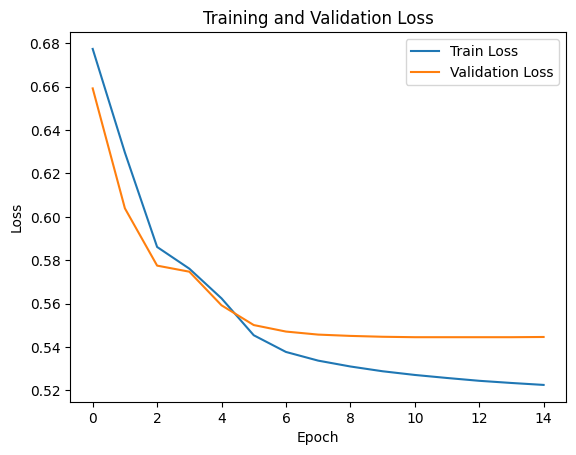

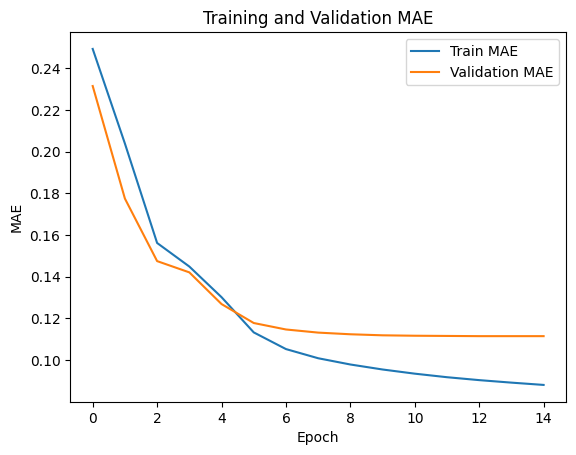

In [27]:
import matplotlib.pyplot as plt

# Caminho do arquivo de histórico salvo
history_filepath = '/content/drive/MyDrive/anime-dataset/reconstructed_training_history.json'

# Carregar o histórico salvo
with open(history_filepath, 'r') as f:
    saved_history = json.load(f)

# Visualizar as curvas de perda
plt.plot(saved_history["loss"], label="Train Loss")
plt.plot(saved_history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Visualizar as curvas de MAE
plt.plot(saved_history["mae"], label="Train MAE")
plt.plot(saved_history["val_mae"], label="Validation MAE")
plt.title("Training and Validation MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()


### Recomendação

In [28]:
def extract_weights(name, model):
    # Obter a camada pelo nome do modelo
    weight_layer = model.get_layer(name)

    # Extrair os pesos da camada
    weights = weight_layer.get_weights()[0]

    # Normalizar os pesos
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))

    return weights

# Extrair os pesos dos embeddings de animes
anime_weights = extract_weights('anime_embedding', model)
# Extrair os pesos dos embeddings de usuários
user_weights = extract_weights('user_embedding', model)

Lendo todo o Dataset

In [29]:
df_anime=pd.read_csv('/content/drive/MyDrive/anime-dataset/anime-dataset-2023.csv')

Agora eu quero que o meu modelo recomende apenas aqueles animes que tenham sido avaliados por pelo menos um determinado número de usuários, que será definido como o limite. Esse limite ajuda a garantir que os títulos de animes recomendados tenham recebido uma quantidade suficiente de avaliações, indicando um certo nível de popularidade ou engajamento dos usuários.

In [30]:
popularity_threshold = 50
df_anime= df_anime.query('Members >= @popularity_threshold')
print(df_anime.shape)
df_anime.head(3)

(22879, 24)


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


# 1: Recomendação Baseada em Itens



In [44]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_animes(name, n=10, return_dist=False, neg=False, popularity_threshold=50):
    try:
        # Buscar o anime pelo nome na base de dados
        anime_row = df_anime[df_anime['Name'] == name].iloc[0]
        index = anime_row['anime_id']
        encoded_index = anime_encoder.transform([index])[0]  # Codificando o índice do anime
        weights = anime_weights  # Pesos dos animes

        # Calculando a similaridade com cosine similarity
        dists = cosine_similarity([weights[encoded_index]], weights)[0]

        # Filtrando os animes por popularidade
        df_filtered = df_anime[df_anime['Members'] >= popularity_threshold]

        # Ordenando os animes pela similaridade
        sorted_dists = np.argsort(dists)
        n = n + 1  # Ajustando a quantidade de animes a ser retornado
        if neg:
            closest = sorted_dists[:n]  # Se neg for True, pegar os mais próximos
        else:
            closest = sorted_dists[-n:]  # Caso contrário, pegar os mais distantes

        print('Animes mais próximos de {}'.format(name))
        if return_dist:
            return dists, closest  # Retorna as distâncias, caso return_dist seja True

        SimilarityArr = []  # Lista para armazenar os animes recomendados

        for close in closest:
            decoded_id = anime_encoder.inverse_transform([close])[0]  # Decodificando o índice do anime
            anime_frame = df_filtered[df_filtered['anime_id'] == decoded_id]  # Buscando o anime na base de dados

            anime_name = anime_frame['Name'].values[0]  # Nome do anime
            english_name = anime_frame['English name'].values[0]  # Nome em inglês do anime
            name = english_name if english_name != "UNKNOWN" else anime_name  # Usando o nome em inglês, se disponível
            genre = anime_frame['Genres'].values[0]  # Gêneros do anime
            Synopsis = anime_frame['Synopsis'].values[0]  # Sinopse do anime
            similarity = dists[close]  # Similaridade com o anime original
            similarity = "{:.2f}%".format(similarity * 100)  # Formatando a similaridade em porcentagem
            SimilarityArr.append({"Name": name, "Similarity": similarity, "Genres": genre, "Synopsis": Synopsis})

        # Criando um DataFrame com os animes mais semelhantes e ordenando pela similaridade
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        return Frame[Frame.Name != name]  # Retorna os animes recomendados, excluindo o anime original
    except KeyError:
        print('{} não encontrado na lista de animes'.format(name))
    except Exception as e:
        print(f"Erro desconhecido: {e}")


In [32]:
find_similar_animes('Neon Genesis Evangelion', n=5, neg=False)

Animes mais próximos de Neon Genesis Evangelion


,Name,Similarity,Genres,Synopsis
4,Neon Genesis Evangelion: The End of Evangelion,96.31%,"Avant Garde, Drama, Sci-Fi",Shinji Ikari is left emotionally comatose afte...
3,Evangelion: 1.0 You Are (Not) Alone,79.88%,"Action, Award Winning, Drama, Sci-Fi","In a post-apocalyptic world, the last remainin..."
2,Evangelion: 2.0 You Can (Not) Advance,72.73%,"Action, Drama, Sci-Fi","When the threat of the Angel menace escalates,..."
1,Akira,68.88%,"Action, Adventure, Horror, Sci-Fi, Supernatural","Japan, 1988. An explosion caused by a young bo..."
0,Neon Genesis Evangelion: Death & Rebirth,68.22%,"Drama, Sci-Fi","In the year 2015, more than a decade has passe..."


In [33]:
find_similar_animes('Shingeki no Kyojin', n=5, neg=False)

Animes mais próximos de Shingeki no Kyojin


,Name,Similarity,Genres,Synopsis
4,Death Note,85.20%,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi..."
3,Code Geass: Lelouch of the Rebellion R2,85.17%,"Action, Award Winning, Drama, Sci-Fi","One year has passed since the Black Rebellion,..."
2,Attack on Titan Season 3 Part 2,83.59%,"Action, Drama",Seeking to restore humanity's diminishing hope...
1,Bleach: Thousand-Year Blood War,83.36%,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...
0,Demon Slayer: Kimetsu no Yaiba Entertainment D...,82.79%,"Action, Fantasy",The devastation of the Mugen Train incident st...


### 2: Recomendação baseada no usuário

(O sistema de recomendação baseado no usuário é dividido em três partes:)

**Parte 1:** Encontrando Usuários Similares:

Nesta parte, selecionamos aleatoriamente um usuário do conjunto de dados e encontramos usuários similares com base em suas preferências de animes.

A função find_similar_users calcula a similaridade entre os usuários utilizando uma matriz ponderada e retorna um DataFrame com os usuários mais semelhantes. A função recebe como entrada um usuário, o número de usuários similares a serem encontrados (n), além de outros parâmetros opcionais.

O resultado é uma lista de usuários semelhantes ao usuário de entrada.

In [45]:
def find_similar_users(item_input, n=10, return_dist=False, neg=False):
    try:
        # Obtém o índice do usuário a partir da entrada (item_input)
        index = item_input
        encoded_index = user_encoder.transform([index])[0]  # Codifica o ID do usuário
        weights = user_weights  # Utiliza os pesos dos usuários extraídos previamente

        # Calcula a similaridade entre o usuário de entrada e todos os outros usuários
        dists = np.dot(weights, weights[encoded_index])

        # Ordena os índices dos usuários com base na similaridade
        sorted_dists = np.argsort(dists)

        # Adiciona +1 para compensar a contagem de usuários próximos
        n = n + 1

        # Determina se queremos usuários mais "distantes" (neg=True) ou mais próximos (neg=False)
        if neg:
            closest = sorted_dists[:n]  # Usuários menos similares
        else:
            closest = sorted_dists[-n:]  # Usuários mais similares

        # Inicializa uma lista para armazenar os usuários similares
        SimilarityArr = []

        # Itera pelos índices dos usuários mais similares
        for close in closest:
            similarity = dists[close]  # Similaridade com o usuário atual

            # Se a entrada for um ID de usuário válido, decodifica o ID
            if isinstance(item_input, int):
                decoded_id = user_encoder.inverse_transform([close])[0]
                # Adiciona o usuário similar e sua similaridade à lista
                SimilarityArr.append({"similar_users": decoded_id, "similarity": similarity})

        # Cria um DataFrame com os usuários similares ordenados pela similaridade
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame  # Retorna o DataFrame com os resultados

    except:
        # Exibe uma mensagem caso o usuário de entrada não seja encontrado
        print('\033[1m{}\033[0m, Not Found in User list'.format(item_input))


In [46]:
# Selecionar um usuário aleatório com menos de 500 avaliações
ratings_per_user = df.groupby('user_id').size()  # Contar o número de avaliações por usuário
random_user = int(ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0])  # Selecionar um usuário aleatório

# Mostrar o ID do usuário selecionado
print(f"Usuário aleatório selecionado: {random_user}")

# Encontrar usuários semelhantes ao usuário aleatório
similar_users = find_similar_users(random_user, n=10, neg=False)

# Filtrar usuários com similaridade acima de 0.4 e remover o próprio usuário
similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]

# Mostrar os usuários semelhantes
similar_users


Usuário aleatório selecionado: 760027


,similar_users,similarity
9,737139,0.433979
8,63061,0.430130
7,361417,0.428629
6,438709,0.426092
5,348395,0.419476
4,104641,0.417836
3,532641,0.417661
2,1217291,0.413191
1,325891,0.413022
0,744551,0.412965


**Parte 2:** Preferências do Usuário

Esta parte foca em compreender as preferências do usuário selecionado. A função get_user_preferences recebe como entrada o ID de um usuário e recupera as preferências de animes desse usuário. Ela considera os animes mais bem avaliados pelo usuário e analisa os gêneros que ele prefere. A função também oferece a opção de exibir uma word cloud para visualizar os gêneros favoritos. A saída é um dataframe contendo os títulos dos animes e seus gêneros associados.

In [47]:
# Função para exibir uma word cloud (nuvem de palavras) com os gêneros preferidos
def showWordCloud(all_genres):
    genres_cloud = WordCloud(
        width=700, height=400,
        background_color='white', colormap='gnuplot'
    ).generate_from_frequencies(all_genres)  # Gera a nuvem de palavras com base na frequência dos gêneros
    plt.figure(figsize=(10, 8))
    plt.imshow(genres_cloud, interpolation='bilinear')  # Mostra a imagem gerada
    plt.axis('off')  # Remove os eixos
    plt.show()

# Função para recuperar as preferências de animes de um usuário
def get_user_preferences(user_id, plot=False, verbose=0):
    # Seleciona os animes avaliados pelo usuário
    animes_watched_by_user = df[df['user_id'] == user_id]

    # Verifica se o usuário avaliou algum anime
    if animes_watched_by_user.empty:
        print("Usuário #{} não assistiu a nenhum anime.".format(user_id))
        return pd.DataFrame()  # Retorna um DataFrame vazio se nenhum anime foi avaliado

    # Calcula o percentil de 75% das notas atribuídas pelo usuário
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    # Filtra os animes com notas acima do percentil de 75%
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    # Ordena os animes por nota e obtém os IDs
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)
        .anime_id.values
    )

    # Busca as informações dos animes filtrados no DataFrame de animes
    anime_df_rows = df_anime[df_anime["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["Name", "Genres"]]  # Mantém apenas as colunas de nome e gênero

    # Exibe informações adicionais, se verbose for diferente de 0
    if verbose != 0:
        print("O usuário \033[1m{}\033[0m assistiu a {} anime(s) com uma nota média de {:.1f}/10\n".format(
            user_id, len(animes_watched_by_user), animes_watched_by_user['rating'].mean()
        ))
        print('\033[1m----- Gêneros preferidos ----- \033[0m\n')

    # Se plot for True, cria uma word cloud com os gêneros preferidos
    if plot:
        genres_list = []  # Lista para armazenar os gêneros
        for genres in anime_df_rows['Genres']:
            if isinstance(genres, str):  # Verifica se o gênero é uma string
                for genre in genres.split(','):  # Separa os gêneros
                    genres_list.append(genre.strip())  # Adiciona o gênero à lista

        # Gera a word cloud com base na contagem dos gêneros
        showWordCloud(dict(Counter(genres_list)))

    # Retorna os animes e seus gêneros preferidos pelo usuário
    return anime_df_rows


O usuário 760027 assistiu a 89 anime(s) com uma nota média de 9.2/10

----- Gêneros preferidos ----- 



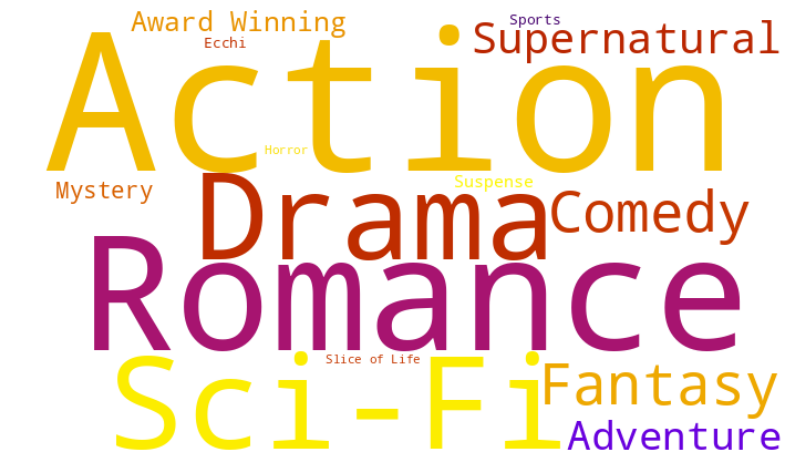

,Name,Genres
51,Full Metal Panic!,"Action, Comedy, Sci-Fi"
52,Full Metal Panic? Fumoffu,"Action, Comedy"
53,Full Metal Panic! The Second Raid,Action
72,Kidou Senshi Gundam SEED,"Action, Award Winning, Drama, Romance, Sci-Fi"
73,Kidou Senshi Gundam SEED Destiny,"Action, Drama, Romance, Sci-Fi"


In [48]:
# Obtém as preferências do usuário aleatório
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
pd.DataFrame(user_pref).head(5)

**Parte 3:** Recomendando Animes para um Usuário

Nesta parte final, recomendamos animes para o usuário selecionado com base nas preferências dos usuários semelhantes. A função get_recommended_animes percorre a lista de usuários semelhantes, recupera suas preferências e identifica os animes que não estão presentes nas preferências do usuário selecionado. Em seguida, gera uma lista de animes recomendados junto com seus gêneros e uma breve sinopse. O resultado é um dataframe contendo os animes recomendados para o usuário.

In [49]:
# Função para recomendar animes para um usuário com base nos usuários semelhantes
def get_recommended_animes(similar_users, user_pref, n=10):
    recommended_animes = []  # Lista para armazenar os animes recomendados
    anime_list = []  # Lista para armazenar os animes assistidos pelos usuários semelhantes

    # Itera sobre os usuários semelhantes
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id))  # Obtém as preferências de anime do usuário semelhante

        # Verifica se o usuário tem animes assistidos
        if not pref_list.empty:
            # Remove os animes que já foram assistidos pelo usuário original
            pref_list = pref_list[~pref_list["Name"].isin(user_pref["Name"].values)]
            anime_list.append(pref_list.Name.values)  # Adiciona os animes assistidos ao anime_list

    # Verifica se não há recomendações disponíveis
    if len(anime_list) == 0:
        print("Não há recomendações de animes disponíveis para os usuários fornecidos.")
        return pd.DataFrame()  # Retorna um DataFrame vazio

    # Cria um DataFrame com a lista de animes
    anime_list = pd.DataFrame(anime_list)

    # Ordena os animes por quantidade de ocorrências e pega os n mais populares
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)

    # Conta o número de usuários que assistiram cada anime
    anime_count = df['anime_id'].value_counts()

    # Itera sobre os animes mais populares
    for i, anime_name in enumerate(sorted_list.index):
        if isinstance(anime_name, str):
            try:
                # Recupera o ID do anime, nome em inglês, gênero e sinopse
                anime_id = df_anime[df_anime.Name == anime_name].anime_id.values[0]
                english_name = df_anime[df_anime['Name'] == anime_name]['English name'].values[0]
                name = english_name if english_name != "UNKNOWN" else anime_name
                genre = df_anime[df_anime.Name == anime_name].Genres.values[0]
                Synopsis = df_anime[df_anime.Name == anime_name].Synopsis.values[0]

                # Obtém o número total de usuários que assistiram a este anime
                n_user_pref = anime_count.get(anime_id, 0)

                # Adiciona o anime recomendado à lista
                recommended_animes.append({
                    "n": n_user_pref,
                    "anime_name": anime_name,
                    "Genres": genre,
                    "Synopsis": Synopsis
                })
            except:
                pass

    # Retorna um DataFrame com os animes recomendados
    return pd.DataFrame(recommended_animes)


In [50]:
# Obter os animes recomendados para o usuário aleatório
recommended_animes = get_recommended_animes(similar_users, user_pref, n=10)

# Exibir as recomendações para o usuário aleatório
print('\n> Principais recomendações para o usuário: {}'.format(random_user))
recommended_animes



> Principais recomendações para o usuário: 760027


,n,anime_name,Genres,Synopsis
0,76710,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...
1,57516,Tengen Toppa Gurren Lagann,"Action, Adventure, Award Winning, Sci-Fi",Simon and Kamina were born and raised in a dee...
2,56206,Toradora!,"Drama, Romance",Ryuuji Takasu is a gentle high school student ...
3,54258,Mononoke Hime,"Action, Adventure, Award Winning, Fantasy",When an Emishi village is attacked by a fierce...
4,7575,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Romance",With the Volunteer Service Club now firmly est...
5,49713,Byousoku 5 Centimeter,"Drama, Romance",What happens when two people love each other b...
6,22784,Death Parade,"Drama, Supernatural, Suspense","After death, either Heaven or Hell awaits most..."
7,60311,Howl no Ugoku Shiro,"Adventure, Award Winning, Drama, Fantasy, Romance","That jumbled piece of architecture, that cacop..."
8,68880,Sen to Chihiro no Kamikakushi,"Adventure, Award Winning, Supernatural","Stubborn, spoiled, and naïve, 10-year-old Chih..."
9,63535,Ouran Koukou Host Club,"Comedy, Romance",Haruhi Fujioka is a studious girl who has rece...


# 3: Recomendação baseada em conteúdo

Este trecho de código utiliza a técnica de TF-IDF (Term Frequency-Inverse Document Frequency) para realizar a filtragem baseada em conteúdo e calcular a similaridade entre animes com base em seus gêneros.

Vetoriza os gêneros dos animes: Utiliza o TfidfVectorizer para transformar os gêneros dos animes em vetores numéricos, descartando palavras irrelevantes (stop words) em inglês.

Criação da matriz TF-IDF: Aplica o fit_transform aos gêneros dos animes para gerar uma matriz esparsa de características.

Calcula a similaridade cosseno: Usa o linear_kernel para calcular a similaridade cosseno entre todos os animes com base nos seus gêneros. O resultado é uma matriz que indica a similaridade entre os animes, com valores próximos de 1 indicando maior similaridade.

Essa abordagem é útil para recomendar animes semelhantes com base nos gêneros, permitindo uma análise de conteúdo sem considerar a avaliação dos usuários.

In [51]:
# Cria um vetor TF-IDF
tfidf = TfidfVectorizer(stop_words='english')

# Definir um gerador para calcular a matriz TF-IDF dinamicamente
tfidf_matrix_generator = tfidf.fit_transform((genre for genre in df_anime['Genres'].values.astype('U')))

# Calcular a matriz de similaridade cosseno como uma matriz esparsa
cosine_sim_sparse = linear_kernel(tfidf_matrix_generator, tfidf_matrix_generator)

In [52]:
# Função para obter recomendações com base na similaridade cosseno, gênero e avaliações com base na pontuação
def get_recommendations(title, cosine_sim, df):
    idx = df_anime[df_anime['Name'] == title].index[0]

    # Calcula as pontuações de similaridade entre o anime no índice dado e todos os outros animes
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filtra os animes com pontuações desconhecidas
    valid_scores = [x for x in sim_scores if df_anime.iloc[x[0]]['Score'] != "UNKNOWN"]

    # Ordena as pontuações de similaridade dos animes com base na similaridade cosseno e na pontuação de avaliação em ordem decrescente
    sorted_scores = sorted(valid_scores, key=lambda x: (x[1], df_anime.iloc[x[0]]['Score']), reverse=True)

    # Obtém os 10 principais animes semelhantes (excluindo o anime original)
    top_animes = [x for x in sorted_scores if x[0] != idx][:10]

    # Extrai os índices dos animes recomendados
    recommended_indices = [idx for idx, _ in top_animes]
    recommended_animes = df_anime.iloc[recommended_indices][['Name', 'Genres', 'Score']]
    return recommended_animes


In [58]:
# Exemplo de uso: Obter recomendações para um anime
anime_title = 'Death Note'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recomendações para "{anime_title}":')
recommendations


Recomendações para "Death Note":


,Name,Genres,Score
2722,Death Note: Rewrite,"Supernatural, Suspense",7.7
16682,Munou na Nana,"Supernatural, Suspense",7.18
12808,Warau Salesman Special Program,"Supernatural, Suspense",6.09
11792,Zhongguo Jingqi Xiansheng,"Comedy, Supernatural, Suspense",6.05
3785,Ga-Rei: Zero,"Action, Supernatural, Suspense",7.58
6277,Mirai Nikki (TV),"Action, Supernatural, Suspense",7.42
9164,Imawa no Kuni no Alice,"Action, Supernatural, Suspense",7.29
9001,Meisou! Underworld,"Action, Supernatural, Suspense",5.65
1317,Shuranosuke Zanmaken: Shikamamon no Otoko,"Action, Supernatural, Suspense",4.7
9710,Death Parade,"Drama, Supernatural, Suspense",8.15


In [79]:
anime_title = 'Dragon Ball'
recommendations = get_recommendations(anime_title, cosine_sim_sparse, df_anime)
print(f'Recommendations for "{anime_title}":')
recommendations

Recommendations for "Dragon Ball":


,Name,Genres,Score
15568,Tensei shitara Slime Datta Ken 2nd Season,"Action, Adventure, Comedy, Fantasy",8.39
16626,Tensei shitara Slime Datta Ken 2nd Season Part 2,"Action, Adventure, Comedy, Fantasy",8.33
734,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy",8.16
14165,Tensei shitara Slime Datta Ken,"Action, Adventure, Comedy, Fantasy",8.14
10865,Drifters,"Action, Adventure, Comedy, Fantasy",7.90
517,Digimon Adventure,"Action, Adventure, Comedy, Fantasy",7.77
4416,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy",7.73
8217,Pokemon: The Origin,"Action, Adventure, Comedy, Fantasy",7.73
10969,Pokemon XY&Z,"Action, Adventure, Comedy, Fantasy",7.72
8747,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy",7.68
